# Prediction of Promotion in HR Dataset Using Classfication

## Problem Statement

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

    1. They first identify a set of employees based on recommendations/ past performance.
    
    2. Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical.
    
    3. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
    
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.


## Aim of the dataset.

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

## Dataset Description

We have train (54808) and test (23490) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

|Variable|Definition|
|:-------:|:--------|
|employee_id|	Unique ID for employee|
|department|	Department of employee|
|region|	Region of employment (unordered)|
|education|	Education Level|
|gender|	Gender of Employee|
|recruitment_channel|	Channel of recruitment for employee|
|no_of_trainings|	no of other trainings completed in previous year on soft skills, technical skills etc.|
|age|	Age of Employee|
|previous_year_rating|	Employee Rating for the previous year|
|length_of_service|	Length of service in years|
|KPIs_met >80%|	if Percent of KPIs(Key performance Indicators) >80% then 1 else 0|
|awards_won?|	if awards won during previous year then 1 else 0|
|avg_training_score|	Average score in current training evaluations|
|is_promoted|	(Target) Recommended for promotion|



In [1]:
#importing the libraries needed for analysis of the dataset.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import os

In [2]:
%cd "C:\Users\Thor_after_infinity\Desktop\ML Datasets\HR analytics"

C:\Users\Thor_after_infinity\Desktop\ML Datasets\HR analytics


In [3]:
trainhr=pd.read_csv('train_LZdllcl.csv')# importing train file
testhr=pd.read_csv('test_2umaH9m.csv')# importing test file

    -> Train file is complete data including dependent variable(y)

    -> Test file will not have dependent variable(y) which needs to be predicted using model built on train data sample     submission file is where predictions are copied for uploading into competition site for checking the result and accuracy

## Data Preprocessing & Exploratory Data Analysis

In [4]:
print(trainhr.shape)#size of the train file
print(testhr.shape)#size of the test file

(54808, 14)
(23490, 13)


In [5]:
trainhr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
testhr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [7]:
trainhr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
testhr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [9]:
trainhr.isnull().sum()#chechking for missing values

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
testhr.isnull().sum()#chechking for missing values

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

### Imputing the missing values for train dataset.

    -> The train and test dataset have some missing values that need to be filled.

    -> We will concatenate the test and train dataframes for data preprocessing, which requires the same number and order of variables in both dataframes.

    -> Therefore, we will temporarily add a dependent variable to the test data for preprocessing purposes.

In [11]:
testhr['is_promoted']='test'

In [12]:
# Combine Both Dataframes for preprocessing
# For Concatenation of 2 dataframes the number of variables and squence of variables must be same.
combinedf=pd.concat([trainhr,testhr],axis=0)
# axis=0 is Row wise Concatenation
# axis=1 is Column wise Concatenation

In [13]:
combinedf.education.value_counts(dropna=False)

education
Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: count, dtype: int64

In [14]:
combinedf.education.mode()

0    Bachelor's
Name: education, dtype: object

In [15]:
combinedf.education=combinedf.education.fillna("Bachelor's")
#imputing the variable with Bachelor's, as the Bachelor's is most frequent in variable.

In [16]:
combinedf.education.value_counts()

education
Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: count, dtype: int64

In [17]:
combinedf.previous_year_rating.value_counts(dropna=False)

previous_year_rating
3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
NaN     5936
Name: count, dtype: int64

In [18]:
combinedf.previous_year_rating=combinedf.previous_year_rating.fillna(3.0)
#imputing the variable with Bachelor's, as the 3.0 is most frequent in variable. And it is a categorical variable.

In [19]:
combinedf.previous_year_rating.value_counts(dropna=False)

previous_year_rating
3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: count, dtype: int64

### Spliting data into numeric cols and object cols

We are spliting the data into numeric columns and object columns, to scale the data for numeric columns and imputing the dummies in object such each every data can be in 0's and 1's for building the Machine Learning models.

In [20]:
# as 'no_of_trainings','previous_year_rating','KPIs_met >80%', 'awards_won? adding them to objcols. and droping the 
#employee_id as it is a unique identifier and we dont require it.

combinedf.no_of_trainings=combinedf.no_of_trainings.astype('object')
combinedf.previous_year_rating=combinedf.previous_year_rating.astype('object')
combinedf['KPIs_met >80%']=combinedf['KPIs_met >80%'].astype('object')
combinedf['awards_won?']=combinedf['awards_won?'].astype('object')
combinedf=combinedf.drop('employee_id',axis=1)

In [21]:
numcols=combinedf.select_dtypes(include=np.number)
objcols=combinedf.select_dtypes(include=['object'])

In [22]:
numcols.head()

,age,length_of_service,avg_training_score
0,35,8,49
1,30,4,60
2,34,7,50
3,39,10,50
4,45,2,73


In [23]:
objcols.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,5.0,1,0,0
1,Operations,region_22,Bachelor's,m,other,1,5.0,0,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,3.0,0,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,1.0,0,0,0
4,Technology,region_26,Bachelor's,m,other,1,3.0,0,0,0


In [24]:
numcols.columns

Index(['age', 'length_of_service', 'avg_training_score'], dtype='object')

### Scaling the numeric columns

In [25]:
#standard scaler
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()

In [27]:
numcols_scaled=scaler.fit_transform(numcols)

In [28]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [29]:
numcols_scaled.head()

,age,length_of_service,avg_training_score
0,0.026400,0.506357,-1.072184
1,-0.625841,-0.435253,-0.250282
2,-0.104048,0.270954,-0.997466
3,0.548193,0.977162,-0.997466
4,1.330882,-0.906058,0.721058


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
minmax=MinMaxScaler()

In [32]:
numcols_minmax=minmax.fit_transform(numcols)

In [33]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

In [34]:
numcols_minmax.head()

,age,length_of_service,avg_training_score
0,0.375,0.194444,0.166667
1,0.250,0.083333,0.350000
2,0.350,0.166667,0.183333
3,0.475,0.250000,0.183333
4,0.625,0.027778,0.566667


In [35]:
from sklearn.preprocessing import RobustScaler

In [36]:
robust=RobustScaler()

In [37]:
numcols_robust=robust.fit_transform(numcols)

In [38]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [39]:
numcols_robust.head()

,age,length_of_service,avg_training_score
0,0.2,0.75,-0.44
1,-0.3,-0.25,0.00
2,0.1,0.50,-0.40
3,0.6,1.25,-0.40
4,1.2,-0.75,0.52


### Data Manipulation (dummy encoding of categorical variables.)

In [40]:
objcols.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'KPIs_met >80%',
       'awards_won?', 'is_promoted'],
      dtype='object')

In [41]:
objcols_dummy=pd.get_dummies(objcols,columns=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?'])

In [42]:
objcols_dummy.head()

,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,...,no_of_trainings_10,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,0,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,True,False
1,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
2,0,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,True,False
3,0,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,True,False
4,0,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,True,False,True,False


In [43]:
objcols_dummy.replace({False:0,True:1},inplace=True)
objcols_dummy.head()

,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,...,no_of_trainings_10,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [44]:
combinedf_clean=pd.concat([numcols_minmax.reset_index(),objcols_dummy.reset_index()],axis=1)
# I have used the RobustScaler for numerical variables for scaling.

In [45]:
combinedf_clean.head()

,index,age,length_of_service,avg_training_score,index,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,...,no_of_trainings_10,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,0,0.375,0.194444,0.166667,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,1,0.250,0.083333,0.350000,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,2,0.350,0.166667,0.183333,2,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,3,0.475,0.250000,0.183333,3,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,4,0.625,0.027778,0.566667,4,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [46]:
combinedf_clean.drop(['index'],axis=1,inplace=True)

In [47]:
#split data back to train and test 
trainhr_df=combinedf_clean[combinedf_clean.is_promoted!='test']
testhr_df=combinedf_clean[combinedf_clean.is_promoted=='test']

In [48]:
#split data back to train and test for EDA Hypothesis testing as this dataset doesn't have scaled numerical variables
#and dummies in categorical columns.
trainhr_EDA=combinedf[combinedf.is_promoted!='test']
testhr_EDA=combinedf[combinedf.is_promoted=='test']

### Descriptive statistics using the train dataset.

In [49]:
trainhr_EDA.no_of_trainings.describe()

count     54808
unique       10
top           1
freq      44378
Name: no_of_trainings, dtype: int64

In [50]:
trainhr_EDA.age.describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [51]:
trainhr.length_of_service.describe()

count    54808.000000
mean         5.865512
std          4.265094
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64

In [52]:
trainhr_EDA.avg_training_score.describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

### Data Visualization of categorical variables.

is_promoted
0    50140
1     4668
Name: count, dtype: int64


<Axes: ylabel='count'>

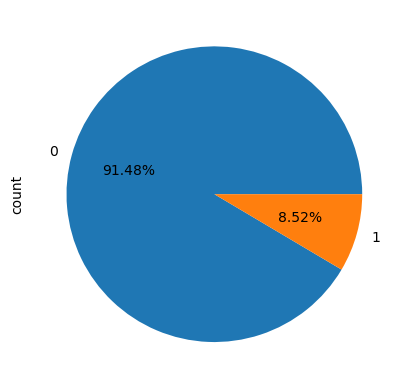

In [53]:
#frequency counts of is_promoted,gender,previous_year_ratnig,with pie diagram
print(trainhr_EDA.is_promoted.value_counts())
trainhr_EDA.is_promoted.value_counts().plot(kind='pie',autopct='%0.2f%%')

gender
m    38496
f    16312
Name: count, dtype: int64


<Axes: ylabel='count'>

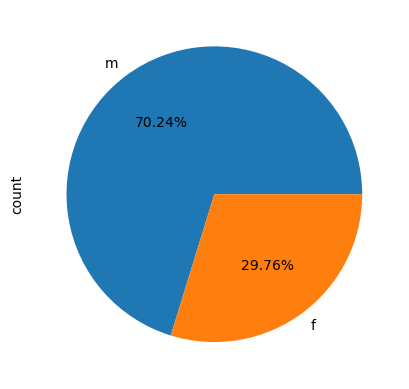

In [54]:
print(trainhr_EDA.gender.value_counts())
trainhr_EDA.gender.value_counts().plot(kind='pie',autopct='%0.2f%%')

previous_year_rating
3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64


<Axes: ylabel='count'>

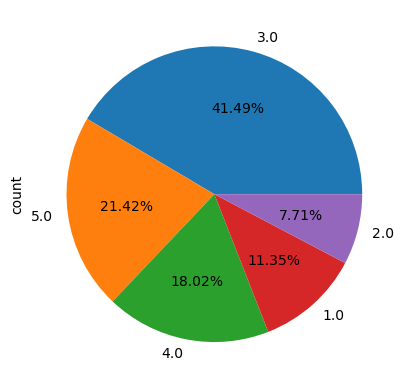

In [55]:
print(trainhr_EDA.previous_year_rating.value_counts())
trainhr_EDA.previous_year_rating.value_counts().plot(kind='pie',autopct='%0.2f%%')

### Crosstablulation of categorical variables

In [56]:
pd.crosstab(trainhr_EDA.is_promoted,trainhr_EDA.recruitment_channel)

recruitment_channel,other,referred,sourcing
is_promoted,,,
0,27890,1004,21246
1,2556,138,1974


In [57]:
pd.crosstab(trainhr_EDA.is_promoted,trainhr_EDA['KPIs_met >80%'])

KPIs_met >80%,0,1
is_promoted,,
0,34111,16029
1,1406,3262


In [58]:
pd.crosstab(trainhr_EDA.is_promoted,trainhr_EDA['awards_won?'])

awards_won?,0,1
is_promoted,,
0,49429,711
1,4109,559


### Data Aggregation

In [59]:
trainhr_EDA.avg_training_score.groupby(trainhr_EDA.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [60]:
trainhr_EDA.length_of_service.groupby(trainhr_EDA.is_promoted).mean()

is_promoted
0    5.879398
1    5.716367
Name: length_of_service, dtype: float64

In [61]:
trainhr_EDA.age.groupby(trainhr_EDA.is_promoted).mean()

is_promoted
0    34.844037
1    34.372965
Name: age, dtype: float64

### Hypothesis testing

In [62]:
#performing hypothesis testing using T-Test.

one=trainhr_EDA[trainhr_EDA.is_promoted==1]
zero=trainhr_EDA[trainhr_EDA.is_promoted==0]

Null hypothesis - There is no significant difference between the two given variables. (p-values greater than 0.05)

Alternative Hypothesis - There is significant difference between the two given variables.(p-values less than 0.05)

In [63]:
from scipy.stats import ttest_ind #importing the ttest_ind for hypothesis testing.

In [64]:
#Hypothesis testing to find if there is a significant difference between avg_training_score and is_promoted

ttest_ind(one.avg_training_score,zero.avg_training_score,equal_var=False)

#since pvalue=7.662329172468838e-291 is lessthan 0.05,reject null

#Alternative Hypothesis True, There is significant difference between avg_training_score and is_promoted

TtestResult(statistic=38.82675007357188, pvalue=7.662329172468838e-291, df=5363.307824110073)

In [65]:
#Hypothesis testing is to find if there is a significant difference between is_promoted and length_of_service

ttest_ind(one.length_of_service,zero.length_of_service,equal_var=False)

#since pvalue=0.008262946987836755 is lessthan 0.05,reject null

#Alternative Hypothesis True, There is significant difference between is_promoted and length_of_service

TtestResult(statistic=-2.6420549711884886, pvalue=0.008262946987836755, df=5708.750739466446)

In [66]:
#performing hypothesis testing using one way anova

trainhr_EDA.avg_training_score.groupby(trainhr_EDA.previous_year_rating).mean()

previous_year_rating
1.0    60.064760
2.0    61.924024
3.0    64.045423
4.0    64.119773
5.0    63.781364
Name: avg_training_score, dtype: float64

In [67]:
ones=trainhr_EDA[trainhr_EDA.previous_year_rating==1.0]
two=trainhr_EDA[trainhr_EDA.previous_year_rating==2.0]
three=trainhr_EDA[trainhr_EDA.previous_year_rating==3.0]
four=trainhr_EDA[trainhr_EDA.previous_year_rating==4.0]
five=trainhr_EDA[trainhr_EDA.previous_year_rating==5.0]

In [68]:
from scipy.stats import f_oneway #importing the f_oneway for hypothesis testing.

In [69]:
#Hypothesis testing is to find if there is a significant difference between previous_year_rating and avg_training_score

f_oneway(ones.avg_training_score,two.avg_training_score,three.avg_training_score,
         four.avg_training_score,five.avg_training_score)

#since pvalue=6.957044805766572e-114) is lessthan 0.05,reject null

#Alternative Hypothesis True, There is significant difference between previous_year_rating and avg_training_score

F_onewayResult(statistic=133.71725352260415, pvalue=6.957044805766572e-114)

In [70]:
#Hypothesis testing is to find if there is a significant difference between previous_year_rating and length_of_service


f_oneway(ones.length_of_service,two.length_of_service,three.length_of_service,
         four.length_of_service,five.length_of_service)

#since pvalue=2.89045896511553e-124 is lessthan 0.05,reject null

#Alternative Hypothesis True, There is significant difference between previous_year_rating and length_of_service

F_onewayResult(statistic=145.83450031447595, pvalue=2.89045896511553e-124)

In [71]:
#To find the relationship between two categorical we are doing chi2 test of hypothesis

from scipy.stats import chi2_contingency

Null hypothesis - There is no relationship between the two given variables. (p-values greater than 0.05)

Alternative Hypothesis - There is significant difference between the two given variables.(p-values less than 0.05)

In [72]:
chi2_contingency(pd.crosstab(trainhr_EDA.is_promoted,trainhr_EDA.gender))

#since pvalue=0.009765091521176657 is lessthan 0.05,reject null

#Alternative Hypothesis True, There is significant difference between the is_promoted and gender

Chi2ContingencyResult(statistic=6.677254566546107, pvalue=0.009765091521176657, dof=1, expected_freq=array([[14922.70617428, 35217.29382572],
       [ 1389.29382572,  3278.70617428]]))

In [73]:
chi2_contingency(pd.crosstab(trainhr_EDA['KPIs_met >80%'],trainhr_EDA.is_promoted))

#since pvalue=0.0 is lessthan 0.05,reject null

#Alternative Hypothesis True, There is significant difference between the is_promoted and KPIs_met >80%

Chi2ContingencyResult(statistic=2689.3220548467057, pvalue=0.0, dof=1, expected_freq=array([[32492.01539921,  3024.98460079],
       [17647.98460079,  1643.01539921]]))

In [74]:
chi2_contingency(pd.crosstab(trainhr_EDA.is_promoted,trainhr_EDA['awards_won?']))

#since pvalue=0.0 is lessthan 0.05,reject null

#Alternative Hypothesis True, There is significant difference between the is_promoted and awards_won?

Chi2ContingencyResult(statistic=2098.0719210465427, pvalue=0.0, dof=1, expected_freq=array([[48978.16596117,  1161.83403883],
       [ 4559.83403883,   108.16596117]]))

### Splitting trainhr_EDA into X and y for building Machine Learing models 

In [75]:
y=trainhr_df.is_promoted
X=trainhr_df.drop('is_promoted',axis=1)
testhr_df=testhr_df.drop('is_promoted',axis=1)

In [76]:
X.head()

,age,length_of_service,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,...,no_of_trainings_10,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,0.375,0.194444,0.166667,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0.250,0.083333,0.350000,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
2,0.350,0.166667,0.183333,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,0.475,0.250000,0.183333,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0.625,0.027778,0.566667,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [77]:
# we using the labelencoder for dependent variable(y), to change dependent variable to 0's and 1's

from sklearn.preprocessing import LabelEncoder

In [78]:
y=LabelEncoder().fit_transform(y)

<Axes: xlabel='is_promoted'>

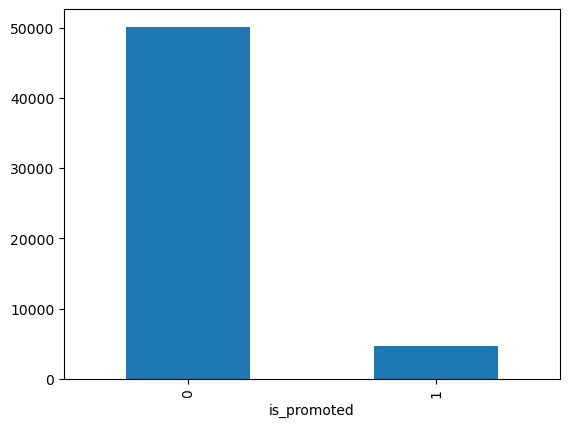

In [79]:
trainhr_df.is_promoted.value_counts().plot(kind='bar')

In [80]:
!pip install smote

In [81]:
from imblearn.over_sampling import SMOTE # importing the smote as the data is been oversampled

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [82]:
#!pip uninstall scikit-learn

In [83]:
#!pip install scikit-learn==1.2.2

# Logistice Regression

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
logit=LogisticRegression(max_iter=3000)

In [86]:
logitmodel=logit.fit(X,y)

In [87]:
logitmodel.score(X,y)

0.9003191065017949

In [88]:
logitpredict=logitmodel.predict(X)

In [89]:
pd.crosstab(y,logitpredict)

col_0,0,1
row_0,,
0,46193,3947
1,6049,44091


In [90]:
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [91]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     50140
           1       0.92      0.88      0.90     50140

    accuracy                           0.90    100280
   macro avg       0.90      0.90      0.90    100280
weighted avg       0.90      0.90      0.90    100280



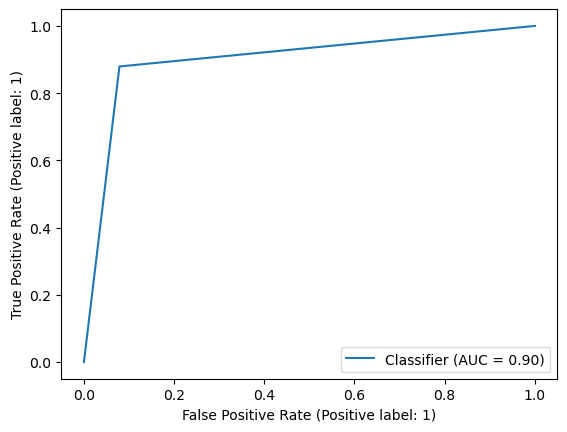

In [92]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [93]:
cross_val_score(logit,X,y)

array([0.79906262, 0.91807938, 0.91827882, 0.92112086, 0.91887714])

In [97]:
np.mean([0.79906262, 0.91807938, 0.91827882, 0.92112086, 0.91887714])

0.8950837640000001

In [98]:
logittest=logitmodel.predict(testhr_df)

In [99]:
pd.DataFrame(logittest).to_csv("Logit.csv")

# Decission Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
tree=DecisionTreeClassifier(max_depth=10)

In [102]:
treemodel=tree.fit(X,y)

In [103]:
treemodel.score(X,y)

0.8671220582369366

In [104]:
cross_val_score(tree,X,y)

array([0.81412046, 0.88382529, 0.87345433, 0.87564819, 0.87275628])

In [105]:
np.mean([0.81666334, 0.87943757, 0.87375349, 0.87370363, 0.87485042])

0.86368169

In [106]:
treetest=treemodel.predict(testhr_df)

In [107]:
pd.DataFrame(treetest).to_csv('tree1.csv')

# Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
RF=RandomForestClassifier(max_depth=5,n_estimators=500)

In [110]:
RFmodel=RF.fit(X,y)

In [111]:
RFmodel.score(X,y)

0.7628240925408856

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
cross_val_score(RF,X,y)

array([0.75633227, 0.76301356, 0.75902473, 0.76545672, 0.76834862])

In [114]:
np.mean([0.76062026, 0.76655365, 0.7595732 , 0.76495812, 0.7701436])

0.7643697660000001

In [115]:
RFpredict=RFmodel.predict(testhr_df)

In [116]:
pd.DataFrame(RFpredict).to_csv('RF.csv')

# Gradient Boosting Machine

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

In [151]:
gbc=GradientBoostingClassifier(max_depth=4,n_estimators=500)

In [152]:
gbcmodel=gbc.fit(X,y)

In [153]:
gbcmodel.score(X,y)

0.9646190666134823

In [121]:
cross_val_score(gbc,X,y)

array([0.84024731, 0.9877842 , 0.98982848, 0.99167331, 0.98903071])

In [150]:
np.mean([0.84024731, 0.9877842 , 0.98982848, 0.99167331, 0.98903071])

0.959712802

In [123]:
gbcpredict=gbcmodel.predict(testhr_df)

In [124]:
pd.DataFrame(gbcpredict).to_csv('gbc.csv')

# Naive Bayes

In [125]:
from sklearn.naive_bayes import MultinomialNB

In [126]:
mul=MultinomialNB()

In [127]:
mulmodel=mul.fit(X,y)

In [128]:
mulmodel.score(X,y)

0.7627143996808935

In [129]:
cross_val_score(mul,X,y)

array([0.73913043, 0.76605505, 0.76430993, 0.76984444, 0.76954527])

In [149]:
np.mean([0.73913043, 0.76605505, 0.76430993, 0.76984444, 0.76954527])

0.761777024

In [131]:
mulpredict=mulmodel.predict(testhr_df)

In [132]:
pd.DataFrame(mulpredict).to_csv('mul.csv')

In [133]:
from sklearn.naive_bayes import GaussianNB

In [134]:
nbg=GaussianNB()

In [135]:
nbgmodel=nbg.fit(X,y)

In [136]:
nbgmodel.score(X,y)

0.656222576785002

In [154]:
cross_val_score(nbg,X,y)

array([0.6204627 , 0.65910451, 0.66414041, 0.66204627, 0.66414041])

In [ ]:
np.mean([0.6204627 , 0.65910451, 0.66414041, 0.66204627, 0.66414041])

In [155]:
nbgpredict=nbgmodel.predict(testhr_df)

In [156]:
pd.DataFrame(nbgpredict).to_csv('ngb.csv')

In [137]:
from sklearn.naive_bayes import BernoulliNB

In [138]:
bb=BernoulliNB()

In [139]:
bbmodel=bb.fit(X,y)

In [140]:
bbmodel.score(X,y)

0.7423115277223773

In [157]:
cross_val_score(bb,X,y)

array([0.72796171, 0.74665935, 0.74301955, 0.74456522, 0.75004986])

In [ ]:
np.mean([0.72796171, 0.74665935, 0.74301955, 0.74456522, 0.75004986])

In [141]:
bbpredict=bbmodel.predict(testhr_df)

In [142]:
pd.DataFrame(bbpredict).to_csv('bb.csv')

# SVC

In [143]:
from sklearn.svm import SVC

In [144]:
svc=SVC(C=3)

In [145]:
svcmodel=svc.fit(X,y)

In [146]:
svcmodel.score(X,y)

0.9391703230953331

In [147]:
svcpredict=svcmodel.predict(testhr_df)

In [148]:
pd.DataFrame(svcpredict).to_csv('svc.csv')

In [ ]:
cross_val_score(svc,X,y)